In [1]:
%matplotlib inline

# Math Expressions

We are using python embedded in our web browser to do our calculations.  We can use it just like a calculator to add, subtract, multiply, and divide numbers, e.g.

In [2]:
1.0 + 2

3.0

In [3]:
5.23 - 15

-9.77

In [4]:
3/4

0.75

In [5]:
4*4

16

We can also use the `**` operator to raise a number to a power, e.g.,

In [6]:
2**3

8

More complex operations come through the math module.  We import that (this only needs to be done once), and then can access anything in math by prefixing it with `math.`

We will use the square-root function, `math.sqrt()`, e.g.,

In [7]:
import math

In [8]:
math.sqrt(16)

4.0

In python, it is useful to store information in named variables.  We can use any letters or numbers in variable named (but they need to start with a letter).  And we assign a value using the `=` operator:

In [9]:
a = 1.2
b = 2.0
a*b

2.4

# Orbits

We want to consider planetary orbits.  To do this, we need to solve Newton's second law together with Newton's law of gravity.  If we restrict ourselves to the x-y plane, then there are 4 quantities we need to solve for: $x$, $y$, $v_x$, and $v_y$.  These evolve according to:
\begin{align*}
\frac{dx}{dt} &= v_x \\
\frac{dy}{dt} &= v_y \\
\frac{dv_x}{dt} &= a_x = -\frac{GM_\star x}{r^3} \\
\frac{dv_y}{dt} &= a_y = -\frac{GM_\star y}{r^3}
\end{align*}

To integrate these forward in time, we need an initial condition for each quantity.  We'll setup our system such that the Sun is at the origin (that will be one focus), and the planet begins at perihelion and orbits counterclockwise. 

![geometry](orbit_setup.png)

Recall that the distance of perihelion from the focus is:
$$r_p = a (1 - e)$$
where $a$ is the semi-major axis and $e$ is the eccentricity.  The perihelion velocity is all in the $y$ direction and is:
$$v_y = v_p = \sqrt{\frac{GM_\star}{a} \frac{1+e}{1-e}}$$

We will integrate this system _numerically_.  The basic idea is that we start with our initial conditions and then we advance the position of the planet through a very small amount of time, $\Delta t$.  This gives an updated position.  A very simple way is to just use the initial position to evaluate the righthand side of our equations.  This gives an update:
\begin{align*}
x_1 &= x_0 + \Delta t \, {v_x}_0 \\
y_1 &= y_0 + \Delta t \, {v_y}_0 \\
{v_x}_1 &= {v_x}_0 - \Delta t \frac{GM_\star x_0}{r_0^3} \\
{v_y}_1 &= {v_y}_0 - \Delta t \frac{GM_\star y_0}{r_0^3}
\end{align*}

You then keep repeating this until you've evolved for the amount of time you want.

This method is called _Euler's Method_.  It is simple to implement, but it is not very accurate.  The formal reason for it not being accurate is that the error is proportional to $\Delta t$, so you need to make $\Delta t$ really small to get a good solution.

We'll instead use a more complex integration method, called 4th order Runge-Kutta.  Runge-Kutta takes several Euler-like steps (at $\Delta t/2$ and $\Delta t$) and combines them together to get a more accurate solution.  The "4th order" means that the error is proportional to $(\Delta t)^4$, so if you make $\Delta t$ a little smaller, the error drops a lot.

We have a module, `orbit_integrate` (shortened to `oi` here) that implements this for us.  Let's look at how to use it.

In [10]:
import orbit_integrate as oi

We will use a library called `orbit_integrate` (abbreviated below as `oi`) to do the orbital integration for us.  Using this is pretty simple -- we first create an orbit _object_ (we'll call it `o` in all the examples below), and then we interact with that object.

For example, to create an orbit with a semi-major axis, `a` of 1.5 AU, and an eccentricity, `e`, of 0.5, we do:
```
o = oi.Orbit(a=1.5, e=0.5)
```

Next we tell the orbit object that we want to integrate.  By default, it will integrate for one period, but you can specify the timescale to integrate using the `num_periods` argument, giving a fraction of a period.  For example, to integrate for 60% of an orbital period, we do:
```
o.integrate(num_periods=0.6)
```

After integrating, the `o` object contains all of the position and velocity information for the orbit at several different points in time (the time interval between points varies, since our integrator adjusts it as needed to get good accuracy).  For example, the following information is available:

* `o.t` : the time (in s)
* `o.x` : the x location (in m)
* `o.y` : the y location (in m)
* `o.vx` : the x-velocity (in m/s)
* `o.vy` : the y-velocity (in m/s)

The orbit object can also make a plot and print out this data in a nice format for you, using the `.plot()` and `.data()` methods.

Here's an example:

In [11]:
o = oi.Orbit(a=1.5, e=0.5)
o.integrate(num_periods=0.6)

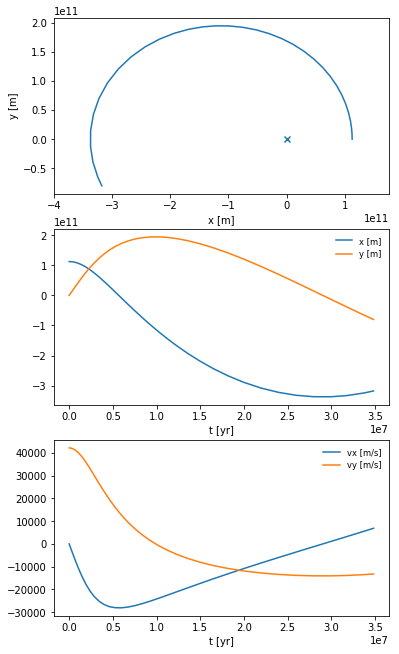

In [12]:
o.plot()

We can get a nice table of the orbital properties using the `.data()` method:

In [13]:
o.data()

n        time (s):         x (m),         y (m),      vx (m/s),      vy (m/s)
  0             0:     1.125e+11,             0,             0,      42179.27
  1      202207.4:  1.122846e+11,  8.523521e+09,     -2128.427,       42098.6
  2      429731.2:    1.1153e+11,  1.807372e+10,     -4498.156,      41817.16
  3      737300.8:  1.096643e+11,  3.083839e+10,     -7612.158,      41129.33
  4       1083189:   1.06452e+11,  4.487519e+10,        -10923,      39971.05
  5       1473955:  1.015038e+11,  6.017077e+10,     -14338.99,      38248.61
  6       1900629:  9.467076e+10,  7.601946e+10,     -17606.04,      35985.41
  7       2364431:  8.579332e+10,  9.207914e+10,     -20573.32,      33228.63
  8       2865061:  7.483117e+10,  1.079306e+11,     -23108.62,      30081.57
  9       3404549:   6.17866e+10,  1.232351e+11,     -25137.05,      26662.76
 10       3985098:  4.672931e+10,  1.376709e+11,     -26627.43,      23097.84
 11       4609180:  2.978153e+10,  1.509494e+11,     -27587.71, 

As noted above, we can look at the data for individual points.  The number of points is stored as `o.npts`, and python starts counting at `0`.  We index a particular point using `[n]`, where `n` is the index.  For example, to look at the information for `n=4` from the table above, we would do:

In [14]:
x = o.x[4]
y = o.y[4]
print(x, y)

106451950236.0 44875188157.5


The locations of the two foci of the ellipse are given as
* (`o.focus1_x`, `o.focus1_y`)
* (`o.focus2_x`, `o.focus2_y`)

We can compute the distance of our point from a foci as:

In [15]:
d1 = math.sqrt((o.x[4] - o.focus1_x)**2 + (o.y[4] - o.focus1_y)**2)
print(d1)

115524024433.31474


# Kepler's First Law

Kepler's first law says that orbits are ellipses.  An ellipse has the property that for any point on the curve, the sum of the distances to each foci is constant.

### Question 1

Test out Kepler's first law by creating an orbit with an eccentricity of your choice (between 0 and 1), and compute the sum of the distances to each foci for several points

# Kepler's Second Law

Kepler's second law says that a planet sweeps out equal areas in equal times.  Mathematically, this means that
\begin{equation}
\frac{\Delta A}{\Delta t} = \mathrm{constant}
\end{equation}

We can test this (approximately) by computing the area of an orbital segment, $\Delta A$ swept out in a single step and dividing by the corresponding change in time, $\Delta t$.  To make life easier, we will imagine the area swept out from one step to the next to be a triangle, with one point as the focus (Sun), and the other two are successive points on the ellipse.

Our primary foci is located at the origin, (0,0).  In this case, the area of a triangle with vertices (0,0), ($x_a$, $y_a$), and ($x_b$, $y_b$) is:
\begin{equation}
\Delta A = \frac{1}{2} | x_a y_b - x_b y_a |
\end{equation}

Note: this approximation means that our $\Delta A/\Delta t$ should only agree to 2-3 significant digits

### Question 2

Test out Kepler's second law by computing $\Delta A/\Delta t$ for several different segments in the orbit.  Always use two successive points (e.g., $n$, $n+1$) for a single interval.

In [16]:
n = 2
dAdt = abs(o.x[n]*o.y[n+1] - o.x[n+1]*o.y[n])/(o.t[n+1] - o.t[n])
print(dAdt)

4.73832562101e+15


In [17]:
n = 10
dAdt = abs(o.x[n]*o.y[n+1] - o.x[n+1]*o.y[n])/(o.t[n+1] - o.t[n])
print(dAdt)

4.73288797843e+15


In [18]:
n = 30
dAdt = abs(o.x[n]*o.y[n+1] - o.x[n+1]*o.y[n])/(o.t[n+1] - o.t[n])
print(dAdt)

4.73555442532e+15


In [19]:
o.period()

1.8371173070873834